# Основы работы с количественными данными

*Алла Тамбовцева*

## Практикум 4. Доверительные интервалы и немного визуализации


### Часть 1. Доверительные интервалы для доли и среднего

В этой части для работы нам понадобится:
    
* библиотека `numpy` для создания массива;
* модуль `stats`, который скрыт в библиотеке `scipy` (от *Scientific Python*, библиотека для научных вычислений, сам модуль `stats` нужен для доверительных интервалов и статистических тестов):

In [1]:
import numpy as np
import scipy.stats as st

И библиотеку, и модуль, мы импортировали с сокращёнными названиями, чтобы не «таскать» эти длинные названия за собой при вызове функций.

#### Доверительный интервал для доли

Представим себе, что у нас есть массив из 0 и 1, где значением 1 закодированы ответы «да», а значением 0 – ответы «нет»:

In [2]:
yes_no = np.array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

Мы хотим построить доверительный интервал для доли ответов «да», то есть для доли единиц. Как строится доверительный интервал для доли? Вот так:

$$
[p - c \times \text{SE}; p + c \times \text{SE}],
$$

где $p$ – это доля, полученная по выборке, $\text{SE}$ – стандартная ошибка доли, а $c$ – некоторое число, которое зависит от уровня доверия. Мы обсуждали, что при построении 95%-ного доверительного интервала, если выборка достаточно большая, можно считать $c$ примерно равным 2, поэтому:

$$
[p - 2 \times \text{SE}; p + 2 \times \text{SE}],
$$

Однако Python может построить любой интервал, необязательно для уровня доверия 95%, к тому же более точно, без приближений и округлений. Для этого ему нужно знать значение $p$ и $\text{SE}$.

В нашем случае $p$ – это доля единиц. Поэтому для вычисления доли мы можем воспользоваться функцией для нахождения среднего, так как:

* среднее – это сумма элементов, деленная на общее число элементов;
* доля – это число единиц, деленное на общее число элементов;
* при суммировании нули не считаются, поэтому результаты выше эквивалентны.

Итак, доля:

In [3]:
p = np.mean(yes_no)
p

0.4

По аналогичным причинам стандартная ошибка доли $\text{SE}$ в случае бинарного массива будет совпадать со стандартной ошибкой среднего. А функция для нахождения стандартной ошибки среднего в Python уже есть, она встроена в импортированный модуль `stats`:

In [4]:
# sem – от Standard Error of a Mean

se_p = st.sem(yes_no)
se_p

0.16329931618554522

Отлично! Мы могли бы сами примерно посчитать границы 95%-ного доверительного интервала, прибавив или вычтя из `p` удвоенное значение стандартной ошибки `se_p`, но пусть это сделает Python:

In [5]:
st.norm.interval(0.95, loc = p, scale = se_p)

(0.07993922157631267, 0.7200607784236874)

Пояснения к коду:
    
* функция `norm.interval()` для построения интервала (`norm` – так как распределение нормальное);
* 0.95: уровень доверия на первом месте;
* `loc`: сама доля, вокруг которой мы откладываем интервал (от *location* – позиция центра);
* `scale`: стандартная ошибка доли (*scale* – мера разброса).

**Интерпретация.** С 95%-ной уверенностью можно утверждать, что истинная доля ответивших «да» (доля в генеральной совокупности, среди всех людей) лежит в интервале от 0.08 до 0.72.

Доверительный интервал получился огромным, очень широким, это неслучайно. Объём выборки в нашем случае маленький, всего 10 наблюдений, поэтому и выводы получаются такими «размытыми». Увеличение объёма выборки приведет к сужению интервала, то есть в более точным оценкам.

Можем посмотреть на 99%-ный доверительный интервал для той же доли, изменив уровень доверия в функции (логично ожидать, что он будет еще шире):

In [6]:
st.norm.interval(0.99, loc = p, scale = se_p)

(-0.020631163880224568, 0.8206311638802246)

**Интерпретация.** С 99%-ной уверенностью можно утверждать, что истинная доля ответивших «да» (доля в генеральной совокупности, среди всех людей) лежит в интервале от 0 до 0.82.

Получили совсем неинформативный интервал, настолько широкий, что доля, согласно ему, даже может выходить за границы отрезка от 0 до 1, чего не бывает. Мораль: для разумных надежных выводов выборки должны быть большими, хотя бы в 30 наблюдений.

**Дополнительно для желающих.** Конечно, далеко не всегда данные представлены в виде готовых удобных массивов из 0 и 1. Но, что удобно, любой массив можно свести к бинарному, а как считать доли для бинарных, мы уже знаем.

Предположим, у нас есть массив из текстовых значений `yes` и `no`:

In [7]:
answers = np.array(["yes", "no", "yes", "no", "yes", "yes", "yes"])

Как определить долю ответов `yes`? Первый шаг: проверяем равенство значению `yes` для всех элементов массива:

In [8]:
answers == "yes"

array([ True, False,  True, False,  True,  True,  True])

Получили набор из логических значений `True` и `False`. Python умеет автоматически заменять `True` на 1, а `False` на 0, поэтому к таким массивам (булевы массивы, так как логический тип данных еще называется булевым по имени логика Дж.Буля) можно применять те же функции суммирования и нахождения среднего. Отсюда второй шаг: считаем среднее по полученному массиву:

In [9]:
# доля ответов yes

np.mean((answers == "yes"))

0.7142857142857143

#### Доверительный интервал для среднего

Теперь представим, что у нас есть массив значений заработной платы (в тысячах рублей) сотрудников некоторой компании:

In [10]:
salary = np.array([50, 60, 90, 60, 55, 45, 50, 30, 35])

Для того, чтобы построить доверительный интервал для среднего, нам понадобится выборочное среднее и стандартная ошибка среднего. С необходимыми функциями мы уже познакомились на примере доли, поэтому просто посчитаем необходимые показатели:

In [11]:
# среднее
m = np.mean(salary)
m

52.77777777777778

In [12]:
# стандартная ошибка среднего
se_m = st.sem(salary)
se_m

5.780181124079114

Теперь построим 95%-ный доверительный интервал для среднего значения заработной платы. Логика построения та же, на первом месте указываем уровень доверия, далее – само среднее и его стандартную ошибку:

In [13]:
# loc: интервал симметричен относительно среднего
# scale: показывает средний разброс вокруг среднего в loc

st.norm.interval(0.95, loc = m, scale = se_m)

(41.44883095046447, 64.10672460509109)

**Интерпретация.** С 95%-ной уверенностью можно утверждать, что истинное среднее значение заработной платы (не по опрошенным сотрудникам, а по всем сотрудникам компании) лежит в интервале от 41 до 64 тысяч рублей.

**Важное уточнение.** Строго говоря, построенный выше доверительный интервал не совсем корректный, потому что значение, на которое домножается стандартная ошибка при построении интервала для среднего, должно извлекаться не из стандартного нормального распределения, а из t-распределения Стьюдента, поскольку выборка маленькая, менее 30 наблюдений (это только для среднего, с долями такого нет). Более корректно здесь было бы использовать функцию `t.interval()`, которая исходит как раз из t-распределения. Это распределение отличается тем, что его вид зависит от числа степеней свободы, специфического параметра, однозначным образом определяющего это распределения (проще говоря, t-распределений бесконечно много, а вот с фиксированным числом степеней свободы оно одно). И число степеней свободы, если мы строим доверительный интервал для среднего на основе выборки, равно числу наблюдений в этой выборке минус 1.

Итого:

In [14]:
# df – сокращение от degrees of freedom, степени свободы
# датафреймы тут ни при чем
# salary.size – считаем число элементов в salary
# затем вычитаем 1

st.t.interval(0.95, loc = m, scale = se_m, df = salary.size - 1)

(39.4486562044095, 66.10689935114605)

Итак, более корректный интервал такой, то есть с 95%-ной уверенностью мы можем утверждать, что среднее значение заработной платы лежит в интервале от 39 до 66 тысяч рублей.

**Практическое резюме:**
    
* если строим доверительный интервал для доли, используем `norm.interval()`;
* если строим доверительный интервал для среднего, используем `t.interval()`, где `df` равен число наблюдений в выборке минус 1; однако если выборка 30 наблюдений и выше, можно использовать и `norm.interval()`, погрешность будет небольшой.

### Часть 2. Немного визуализации (но много кода)

Так как дальше мы будем работать с реальными данными из файла, нам понадобится библиотека `pandas`. Давайте ее импортируем:

In [15]:
import pandas as pd

Также импортируем модуль `pyplot` из библиотеки `matplotlib`, этот модуль отвечает непосредственно за отрисовку графиков разного вида:

In [16]:
import matplotlib.pyplot as plt

Загрузим в Google Colab файл `NPK.xlsx` с результатами нашего сказочного [опроса](https://forms.gle/FHR28YnPVudE7Gn4A) и скопируем путь к нему. Считаем данные из файла Excel с помощью функции `read_excel()` и сохраним их в датафрейм `df`:

In [17]:
df = pd.read_excel("/content/NPK.xlsx")

В отличие от CSV-файлов, в файле Excel может быть несколько листов. Это наш случай, в файле `NPK.xlsx` четыре листа:

* выбор по описанию;
* итоговый выбор;
* лайки;
* актеры.

По умолчанию считывается первый лист из файла Excel, мы же выберем лист с названием `итоговый выбор` (как собрать воедино выбор по описанию, лайки и итоговый выбор, об этом потом). Допишем в функцию опцию `sheet_name` с названием листа:

In [18]:
# в sheet_name может быть и номер листа, если не хочется писать название
# только учитывайте, что нумерация в Python с нуля
# второй лист будет иметь номер 1

df = pd.read_excel("/content/NPK.xlsx", sheet_name = "итоговый выбор")

Посмотрим на данные:

In [19]:
df

,id,группа,профиль,пол,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
0,35,221_223,политология,жен,0,0,0,0,0,1,1,0,0,0
1,36,221_223,политология,жен,0,0,0,0,0,0,1,1,0,0
2,37,221_223,политология,жен,0,0,0,0,0,0,1,1,0,0
3,38,221_223,политология,жен,0,0,0,0,0,0,0,0,1,1
4,39,221_223,политология,муж,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,r6,гк,NaN,муж,0,0,0,1,0,0,1,0,0,0
105,r7,гк,NaN,жен,0,0,0,0,0,1,1,0,0,0
106,r8,гк,NaN,жен,1,0,0,0,0,1,0,0,0,0
107,r9,гк,NaN,муж,0,0,0,0,0,0,1,0,1,0


Таблица с результатами устроена просто: есть столбцы с характеристиками респондентов (`id`, `группа` – учебная группа, `профиль` – специальность студента), а остальные столбцы – это бинарные индикаторы, показывающие, отметил ли респондент героя при итоговом выборе как понравившегося или нет (1 – да, 0 – нет).

Что нам нужно сделать, чтобы понять, кто из героев понравился, в целом, больше всего, а кто – меньше всего? Просто просуммировать столбцы из 0 и 1, потому что сумма даст нам число единиц, а это и есть число проголосовавшихся «за» героев!

В библиотеке `pandas` есть полезный метод `.sum()`, который можно применять как к отдельному столбцу, так и ко всему датафрейму. Если мы применим его ко всему датафрейму, сумма посчитается сразу по каждому столбцу (оцените удобство – за одну строчку кода получаем суммы по всем столбцам, сколько бы их ни было). Единственное, чтобы Python не возмущался, что мы пытаемся суммировать текст, давайте допишем опцию `numeric_only = True`, чтобы при вычислении сумм учитывались только числовые столбцы (*numeric*):

In [20]:
df.sum(numeric_only = True)

Теодор       7
Флора        3
Альбина      8
Патрик      39
Пенапью      4
Давиль      25
Оттилия     45
Жак         31
Марта       32
Марселла    12
dtype: int64

Ура! Получилось! В нашем случае удобнее всего будет отсортировать полученные результаты, чтобы было понятно, кто из героев на каком месте. Для сортировки используется метод `.sort_values()`:

In [21]:
df.sum(numeric_only = True).sort_values()

Флора        3
Пенапью      4
Теодор       7
Альбина      8
Марселла    12
Давиль      25
Жак         31
Марта       32
Патрик      39
Оттилия     45
dtype: int64

Чтобы результаты выглядели ещё более логично, отсортируем их по убыванию (опция `ascending = False`, так как *ascend* – возрастать, а возрастание мы «выключаем»):

In [22]:
tab = df.sum(numeric_only = True).sort_values(ascending = False)
tab

Оттилия     45
Патрик      39
Марта       32
Жак         31
Давиль      25
Марселла    12
Альбина      8
Теодор       7
Пенапью      4
Флора        3
dtype: int64

Все замечательно. Давайте полученные результаты визуализируем. Нам предстоит запустить много кода, но код достаточно универсальный, далее вы сможете просто адаптировать его под свои данные, заменяя `x` и `y` на свои значения и формируя свой список цветов.

Итак, сначала заберем с таблички `tab` выше названия (имена героев, они же индексы `index`) и соответствующие им частоты (они же значения `values`).

In [23]:
x = tab.index
y = tab.values

Посмотрим на них:

In [24]:
x

Index(['Оттилия', 'Патрик', 'Марта', 'Жак', 'Давиль', 'Марселла', 'Альбина',
       'Теодор', 'Пенапью', 'Флора'],
      dtype='object')

In [25]:
y

array([45, 39, 32, 31, 25, 12,  8,  7,  4,  3])

Далее мы построим круговую диаграмму (они считаются немодными и нежелательными, если категорий много, но начнем с нее, а потом перейдем к кольцевой диаграмме). Для круговой диаграммы нужен набор цветов, чтобы закрасить каждый сектор по-своему. В нашем случае нужно 10 цветов, так как основных героев у нас 10. Воспользуемся готовой палитрой [отсюда](https://www.heavy.ai/blog/12-color-palettes-for-telling-better-stories-with-your-data). Готовые палитры всегда выручают, потому что содержат наборы сочетаемых цветов, при этом, если нужно, можно подобрать контрастные цвета.

Давайте возьмем список цветов из палитры *Spring Pastels* и добавим к нему еще один цвет, так как в этой палитре всего 9 цветов (это нестрашно, но если возьмем меньше цветов, чем нужно, Python закрасит какие-то сектора одним и тем же цветом). Сохраним коды цветов в список `cc`:

In [26]:
# 9 цветов скопированы из spring pastels
# последний цвет можете выбрать сами из любой палитры

cc = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a",
      "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7", "#0d88e6"]

Так как круговая диаграмма на английском языке называется *pie chart*, для ее построения нам понадобится функция `pie()`, а скрыта она в модуле `pyplot`, который мы сократили до `plt` при импорте. Этой функции на вход нужно передать следующее:

* частоты для построения графика (значения из `y` в нашем случае);
* подписи `labels` для секторов диаграммы (имена из `x` в нашем случае);
* список цветов `colors` (значения из `cc` в нашем случае).

Также, если мы хотим, чтобы на графике были отмечены проценты (а обычно мы хотим, иначе какой смысл диаграммы), нам нужно добавить опцию `autopct`, которая автоматически переводит абсолютные частоты из `y` в проценты (название функции от *auto percentage*) и указать формат процентов.

Формат процентов:

* если хотим целые числа, то есть проценты, округленные до целых, пишем `%i%%`; в такой записи `%i` означает «подставляй сюда значения типа *integer*», то есть целочисленный формат, а `%%` – символ процента (одиночный `%` воспринимается как специальный символ, сравните смысл `%` перед `i` и здесь);

* если хотим дробные числа, например, проценты, округленные до второго знака после точки, пишем `%.2f%%`; в такой записи `%.2f` означает «подставляй сюда значения типа *float* с двумя знаками после точки», то есть десятичные дроби с точностью до второго знака.

Итак, строим диаграмму:

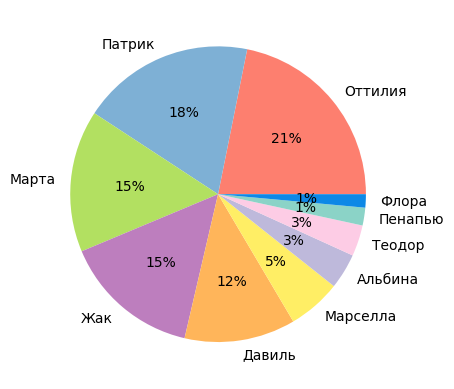

In [27]:
# пример диаграммы с целочисленными процентами
# ; в конце нужна, чтобы Python выводил только график, без
# вспомогательных объектов, нужных ему для построения

plt.pie(y, labels = x, colors = cc, autopct = "%i%%");

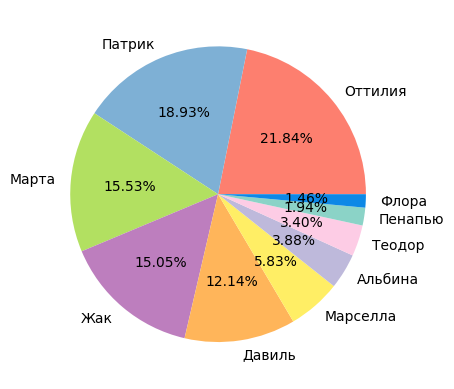

In [28]:
# пример диаграммы с дробными процентами, два знака после точки

plt.pie(y, labels = x, colors = cc, autopct = "%.2f%%");

Круговая диаграмма выглядит не очень плохо, но давайте все же перейдем к кольцевой. В модуле `plt` нет специальной функции для кольцевой диаграммы, поэтому придётся пойти на хитрость:

* построить обычную круговую диаграмму, как выше;
* добавить на неё белый круг желаемого радиуса.

Код далее, конечно, сложноват для восприятия, но давайте просто считать, что у нас есть готовый блок кода для диаграмм, если понадобится, всегда сможете его использовать.

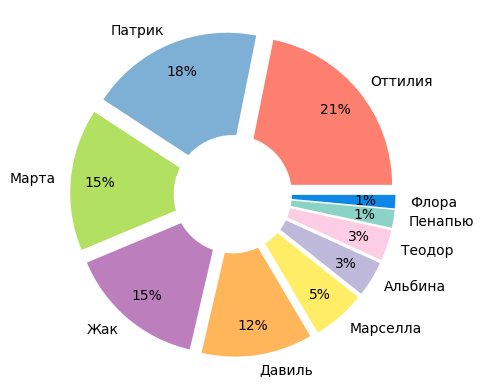

In [29]:
# немного мистики и магии – очерчиваем белый круг
# радиуса 0.4 с центром в (0, 0)
# fc = face color, цвет заливки

centre_circle = plt.Circle((0, 0), 0.4, fc = 'white')

# сохраняем текущий график – тот, что ниже через pie()
# gcf = get current figure

fig = plt.gcf()

# изменяем расстояние до подписей с процентами от центра на 0.8
# pctdistance = 0.8

# добавляем расстояние между секторами explode,
# везде одинаковое, равное 0.1, поэтому нужен список, где 0.1 повторено 10 раз
# чтобы не писать его руками, список [0.1] растягиваем на 10 элементов через *

plt.pie(y,
        colors = cc,
        labels = x,
        autopct = '%.i%%',
        pctdistance = 0.8,
        explode = [0.1] * 10)

# в оси уже существующего графика добавляем круг
# gca = get current axes

fig.gca().add_artist(centre_circle);

Финальный штрих, попробуем выставить размер графика и сделать разрешение повыше, чтобы при выгрузке картинки в файл рисунок был хорошего качества.

Вообще график `matplotlib` состоит из двух частей:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется в переменную `ax`).

Так, мы можем воспользоваться функцией `subplots()` и сообщить Python, что мы хотим получить картинку размера 16 на 9 дюймов с разрешением 300 точек на дюйм (`dpi` – *dots per inch*):

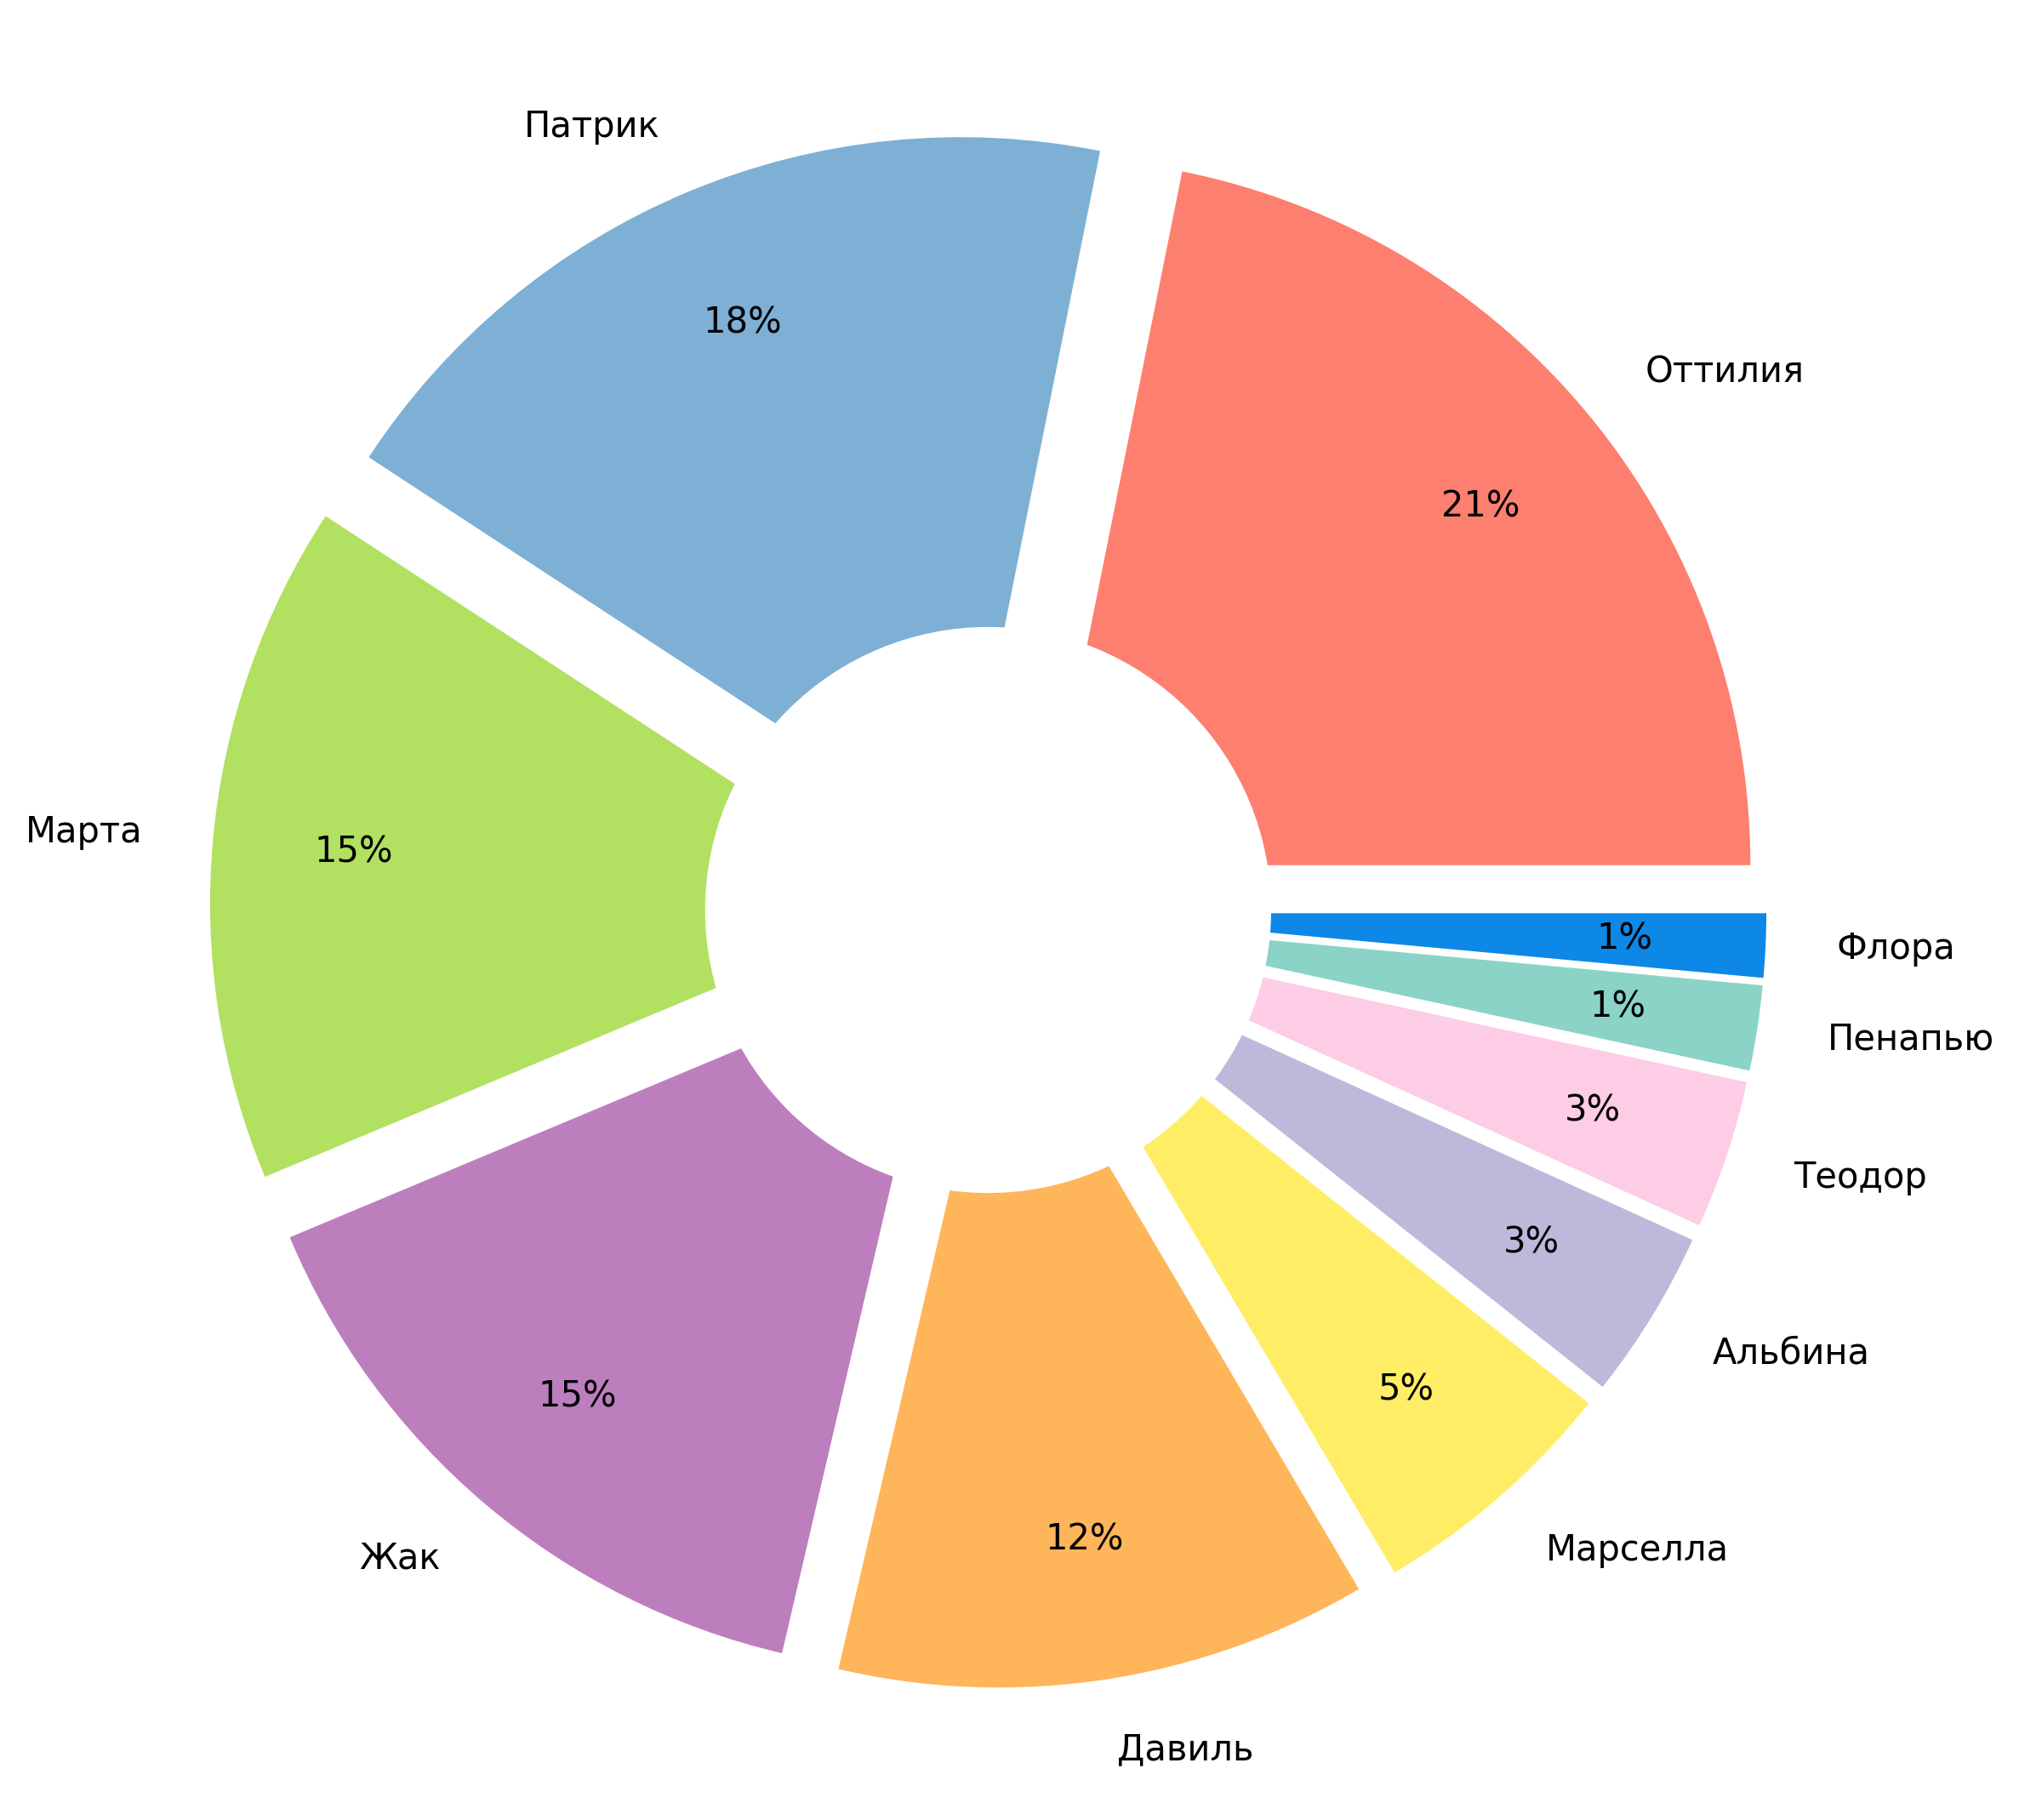

In [30]:
# тот же код, что и выше
# только в начале строка с настройками для картинки

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

centre_circle = plt.Circle((0, 0), 0.4, fc = 'white')
fig = plt.gcf()

plt.pie(y,
        colors = cc,
        labels = x,
        autopct = '%.i%%',
        pctdistance = 0.8,
        explode = [0.1] * 10)

fig.gca().add_artist(centre_circle);

# выгружаем полученную картинку (сохраняется в fig)
# в файл my_pie.png

fig.savefig("my_pie.png")

Так, теперь в Google Colab (в Jupyter Notebook – в рабочей папке, там же, где текущий ipynb-файл) в папке с файлами должен появиться файл с графиком `my_pie.png` в хорошем качестве.